1. Generate two classes of data with the same population size (N1=N2=50), sigma = 0.1, mean1 = [2,2], mean2= [3,3]:

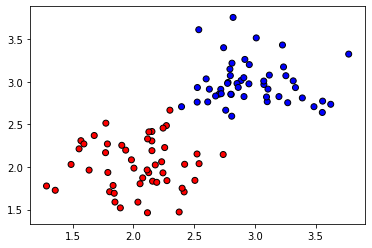

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# generate data
N1 = 50
N2 = 50
K = 2
sigma = 0.1

mean1 = (2, 2)
cov1 = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean1, cov1, N1)
c1 = ['red'] * len(X1)

mean2 = (3, 3)
cov2 = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean2, cov2, N2)
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

t = 1 * np.ones([len(X), 1])
for n in range(0, len(X)):
    if(n < len(X1)):
        t[n] = 0
t = t.astype(int)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.show()

2. Write code of Gaussian Processes to classify the two clusters.

In [2]:
# # X input matrix
# X_input = np.column_stack((np.ones(np.size(X[:, 0])), X))

def get_kernel_value(x_n, x_m, theta_0, theta_1, theta_2, theta_3):
    k_value = theta_0 * np.exp(-(theta_1/2)*np.power(np.linalg.norm((x_n-x_m)),2)) + theta_2 + theta_3*x_n.T.dot(x_m)
    return k_value

def gaussian_process(v, theta_0, theta_1, theta_2, theta_3):
    
    # training
    W_N = np.zeros((len(X), len(X)))
    C_N = np.zeros((len(X), len(X)))
    sigmoid = np.zeros((len(X), 1))
    a_N = np.zeros((len(X), 1))

    delta_mol = 1
    while(delta_mol > 0.001):

        for n, x_n in enumerate(X):

            sigmoid_n = 1 / (1 + np.exp(-a_N[n]))
            sigmoid[n] = sigmoid_n
            W_N[n][n] = sigmoid_n * (1 - sigmoid_n)

            for m, x_m in enumerate(X):
                if n == m:
                    C_N[n][m] = get_kernel_value(x_n, x_m, theta_0, theta_1, theta_2, theta_3) + v
                else:
                    C_N[n][m] = get_kernel_value(x_n, x_m, theta_0, theta_1, theta_2, theta_3)

        C_N_inv = np.linalg.inv(C_N)
        delta = np.linalg.inv(C_N_inv + W_N).dot(t - sigmoid - C_N_inv.dot(a_N))
        a_N = a_N + delta
        delta_mol = np.linalg.norm(delta)

    # testing
    x_1, x_2 = np.meshgrid(np.arange(0,5,0.1),np.arange(0,5,0.1))
    prob_data = np.zeros((x_1.shape[0], x_1.shape[0]))
    for i in range(x_1.shape[0]):
        for j in range(x_1.shape[0]):
            x_new = np.array([[x_1[i][j]], [x_2[i][j]]])
            c_new = get_kernel_value(x_new, x_new, theta_0, theta_1, theta_2, theta_3) + v
            K_new = np.empty([len(X), 1])
            for n, x_n in enumerate(X):
                K_new[n] = get_kernel_value(x_n, x_new, theta_0, theta_1, theta_2, theta_3)

            mu_new = K_new.T.dot(C_N_inv).dot(a_N)
            S_new = c_new - K_new.T.dot(np.linalg.inv(np.linalg.inv(W_N) + C_N)).dot(K_new)
            prob_data[i][j] = 1 / (1 + np.exp(-(mu_new/np.power(1 + (np.pi/8)*np.power(S_new, 2), 1/2))))
    
    return prob_data

3. Use the kernel written on the textbook (page 307, Eq.(6.63)). As for its parameters, initially you set them (1.0, 4.0, 1.0, 2.0).

In [3]:
prob_data = gaussian_process(v=1, theta_0=1.0, theta_1=4.0, theta_2=1.0, theta_3=2.0)

4. Draw the probability map

<function matplotlib.pyplot.show(*args, **kw)>

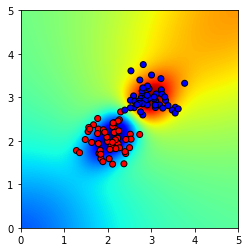

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.imshow(prob_data, cmap = 'jet', extent = [0,5,0,5], interpolation = 'bilinear', origin = 'lower')
plt.show

5. Change the kernel parameters to (1.0, 0.25, 0, 0) to obtain: 

<function matplotlib.pyplot.show(*args, **kw)>

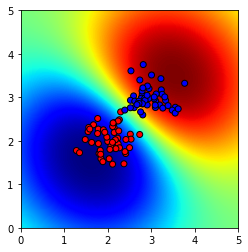

In [5]:
prob_data = gaussian_process(v=1, theta_0=1.0, theta_1=0.25, theta_2=0, theta_3=0)
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.imshow(prob_data, cmap = 'jet', extent = [0,5,0,5], interpolation = 'bilinear', origin = 'lower')
plt.show

6. Discuss why the new parameters generate a less precise probability map.
Let's change the parameter one by one to understand the effect of each hyper-parameter. We first change theta_1 from 4 to 0.25, and the rest remain the same.

<function matplotlib.pyplot.show(*args, **kw)>

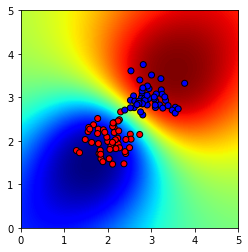

In [6]:
prob_data = gaussian_process(v=1, theta_0=1.0, theta_1=0.25, theta_2=1, theta_3=2)
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.imshow(prob_data, cmap = 'jet', extent = [0,5,0,5], interpolation = 'bilinear', origin = 'lower')
plt.show

We then only change theta_2 from 1 to 0, and the rest remain the same.

<function matplotlib.pyplot.show(*args, **kw)>

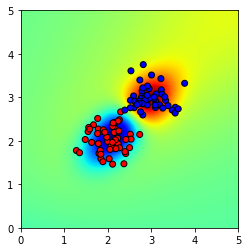

In [7]:
prob_data = gaussian_process(v=1, theta_0=1.0, theta_1=4.0, theta_2=0, theta_3=2)
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.imshow(prob_data, cmap = 'jet', extent = [0,5,0,5], interpolation = 'bilinear', origin = 'lower')
plt.show

We then only change theta_3 from 2 to 0, and the rest remain the same.

<function matplotlib.pyplot.show(*args, **kw)>

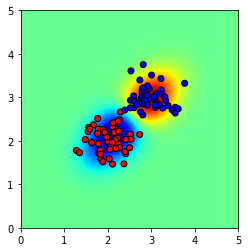

In [8]:
prob_data = gaussian_process(v=1, theta_0=1.0, theta_1=4.0, theta_2=1, theta_3=0)
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.imshow(prob_data, cmap = 'jet', extent = [0,5,0,5], interpolation = 'bilinear', origin = 'lower')
plt.show

As we can observe from the graph, changing theta_1 from 4 to 0.25 is the determining factor that makes the probability map less precise as we change to a kernel of new parameters; theta_2 and theta_3 have very small effect on probability map (in fact, changes in theta_2 and theta_3 have sometime made the probability map more precise if theta_1 remains unchanged).

Because the Gaussian processing replaces $\bar{w}$ and basis entirely with kernels to support the expressiveness of prediction, in order to find out the reason why such changes to the kernel will make the prediction less expressive and prone to underfit, we need to look at the kernel function and the effect of hyper-parameters.

First, note the kernal function:

$$k(x_n, x_m) = \theta_0 exp\{-\frac{\theta_1}{2}||x_n - x_m||^2\} + \theta_2 + \theta_3 x_n^T x_m$$

As we can see, since theta_1 is in the exponential function, changes in theta_1 can be greately amplified, and thus theta_1 has the most effect among all hyper-parameters. If we drop theta_1 from 4 to 0.25, we should expect that the graph of kernal function will become much smoother, as changes in the input is much less amplified.

Indeed, as we can observe in the textbook page 308, if we decrease theta_1 from 4 to 0.25, the graph of kernel function become much "smoother" and has less dramatic changes. Therefore, this decrease in theta_1 will provide much less expressiveness for the classification within the same range of data.

Therefore, the kernel function has become much smoother and less changes (in other world, less sensitive to changes in the input). This mean less expressiveness to support classification and classification is prone to be underfitting.

7. Change the kernel parameters back to (1.0, 4.0, 1.0, 2.0).

kernal parameters changed in question 9.

8. Change the means of the clusters to mean1 = [3,3], mean2= [3.2,3.2], and cov1 = [[0.003, 0],[0.003]], cov2= [[0.3,0],[0,0.3]]:	

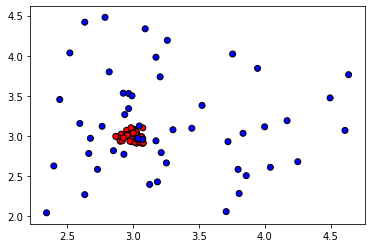

In [9]:
# generate data
N1 = 50
N2 = 50
K = 2

mean1 = (3, 3)
cov1 = [[0.003, 0], [0, 0.003]]
X1 = np.random.multivariate_normal(mean1, cov1, N1)
c1 = ['red'] * len(X1)

mean2 = (3.2, 3.2)
cov2 = [[0.3, 0], [0, 0.3]]
X2 = np.random.multivariate_normal(mean2, cov2, N2)
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

t = 1 * np.ones([len(X), 1])
for n in range(0, len(X)):
    if(n < len(X1)):
        t[n] = 0
t = t.astype(int)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.show()

9. Classify and show the probability map: 

<function matplotlib.pyplot.show(*args, **kw)>

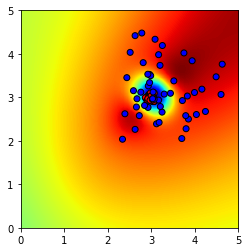

In [10]:
# 7 Change the kernel parameters back to (1.0, 4.0, 1.0, 2.0)
prob_data = gaussian_process(v=1, theta_0=1.0, theta_1=4.0, theta_2=1.0, theta_3=2.0)
# show the probability map
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.imshow(prob_data, cmap = 'jet', extent = [0,5,0,5], interpolation = 'bilinear', origin = 'lower')
plt.show

10. Change the means and clusters back to #1 above, and add another cluster belonging to C2, with mean=[1,1] and sigma=0.1

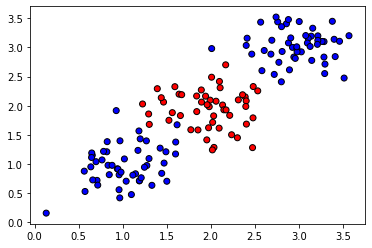

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# generate data
N1 = 50
N2 = 50
K = 2
sigma = 0.1

mean1 = (2, 2)
cov1 = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean1, cov1, N1)
c1 = ['red'] * len(X1)

mean2_1 = (3, 3)
cov2 = [[sigma, 0], [0, sigma]]
X2_1 = np.random.multivariate_normal(mean2_1, cov2, N2)

mean2_2 = (1, 1)
X2_2 = np.random.multivariate_normal(mean2_2, cov2, N2)

X2 = np.concatenate((X2_1, X2_2))
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

t = 1 * np.ones([len(X), 1])
for n in range(0, len(X)):
    if(n < len(X1)):
        t[n] = 0
t = t.astype(int)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.show()

11. Classify and show the probability map: 

<function matplotlib.pyplot.show(*args, **kw)>

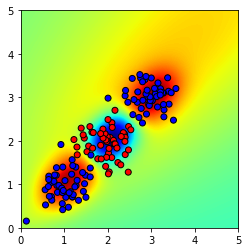

In [12]:
prob_data = gaussian_process(v=1, theta_0=1.0, theta_1=4.0, theta_2=1.0, theta_3=2.0)
# show the probability map
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolor = 'k')
plt.imshow(prob_data, cmap = 'jet', extent = [0,5,0,5], interpolation = 'bilinear', origin = 'lower')
plt.show